In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [3]:
data = pd.read_csv('padding.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario,MLOn,paddingDelayUsec,transitionDelayUsec
0,1,1,1,1,3,36.23640,0.000126,1.271170,69.5243,1093151064,...,1.04073,121.000,121.000,90.4717,909410.0,ns3::ThompsonSamplingWifiManager,3,0,0,16
1,1,2,1,1,3,59.78790,0.000286,1.474390,43.8505,689389288,...,1.01029,120.955,120.955,128.9180,665201.0,ns3::ThompsonSamplingWifiManager,3,0,0,16
2,1,3,1,1,3,16.45640,0.000045,0.893129,91.0707,1432255520,...,1.01356,121.000,121.000,41.7999,837165.0,ns3::ThompsonSamplingWifiManager,3,0,0,16
3,1,4,1,1,3,4.50713,0.000017,0.145097,104.1190,1637111424,...,1.03983,121.000,121.000,18.4090,155458.0,ns3::ThompsonSamplingWifiManager,3,0,0,16
4,1,1,1,1,3,33.48140,0.000113,1.254480,72.5236,1140381544,...,1.03019,120.997,120.997,84.0932,936249.0,ns3::ThompsonSamplingWifiManager,3,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,4,1,1,3,6.11260,0.000021,0.222518,102.3480,1609587560,...,1.01494,121.000,121.000,22.0210,234399.0,ns3::ThompsonSamplingWifiManager,3,0,256,128
96,1,1,1,1,3,63.15770,0.000369,1.806770,40.1785,631617136,...,1.05506,120.991,120.991,152.3280,746851.0,ns3::ThompsonSamplingWifiManager,3,0,256,256
97,1,2,1,1,3,63.83950,0.000380,1.828800,39.4221,619929464,...,1.02021,120.996,120.996,154.1770,741967.0,ns3::ThompsonSamplingWifiManager,3,0,256,256
98,1,3,1,1,3,2.27224,0.000012,0.074515,106.5290,1675426024,...,1.00915,121.000,121.000,13.2326,81704.5,ns3::ThompsonSamplingWifiManager,3,0,256,256


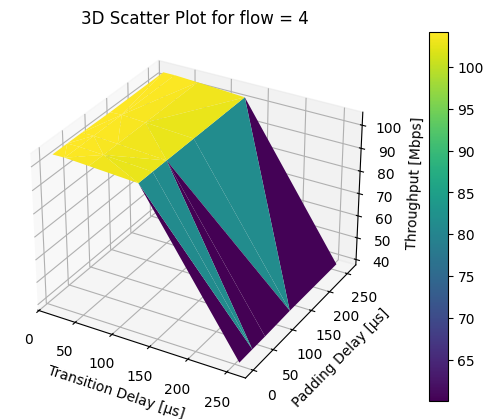

In [21]:
# Filtrowanie danych
filtered_data = data[data['flow'] == 4]

# Wykres
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

sc = ax.plot_trisurf(
    filtered_data['transitionDelayUsec'],
    filtered_data['paddingDelayUsec'],
    filtered_data['throughput'],
    cmap='viridis',
)

# Ustawienie etykiet osi
cbar = fig.colorbar(sc, ax=ax, pad=0.1)

ax.set_zlabel('Throughput [Mbps]')
ax.set_ylabel('Padding Delay [μs]')
ax.set_xlabel('Transition Delay [μs]')

plt.title("3D Scatter Plot for flow = 4")

plt.show()
